In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime

In [117]:

start = '2010-01-01'
end = '2023-12-31'

df = yf.download('SBIN.NS', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473149  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370185  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358407  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400681  447610800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [25]:
df = df.reset_index()
df.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2010-01-04    7.622500    7.660714    7.585000    7.643214    6.461977   
1    2010-01-05    7.664286    7.699643    7.616071    7.656429    6.473149   
2    2010-01-06    7.656429    7.686786    7.526786    7.534643    6.370185   
3    2010-01-07    7.562500    7.571429    7.466071    7.520714    6.358407   
4    2010-01-08    7.510714    7.571429    7.466429    7.570714    6.400681   
...         ...         ...         ...         ...         ...         ...   
3517 2023-12-22  195.179993  195.410004  192.970001  193.600006  193.091385   
3518 2023-12-26  193.610001  193.889999  192.830002  193.050003  192.542816   
3519 2023-12-27  192.490005  193.500000  191.089996  193.149994  192.642548   
3520 2023-12-28  194.139999  194.660004  193.169998  193.580002  193.071426   
3521 2023-12-29  193.899994  194.399994  191.729996  192.529999  192.024185   

         Volume  
0  

In [29]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


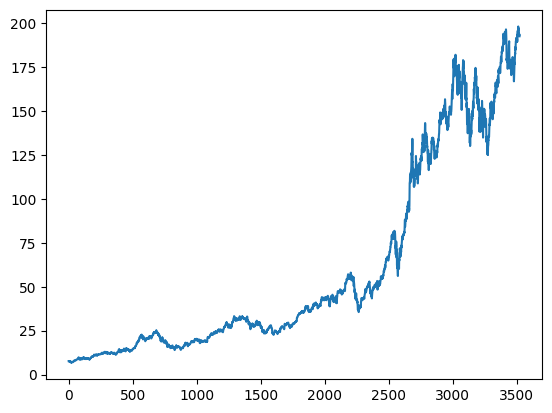

In [31]:
plt.plot(df.Close)

In [32]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3517,195.179993,195.410004,192.970001,193.600006,37122800
3518,193.610001,193.889999,192.830002,193.050003,28919300
3519,192.490005,193.500000,191.089996,193.149994,48087700
3520,194.139999,194.660004,193.169998,193.580002,34049900


In [33]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

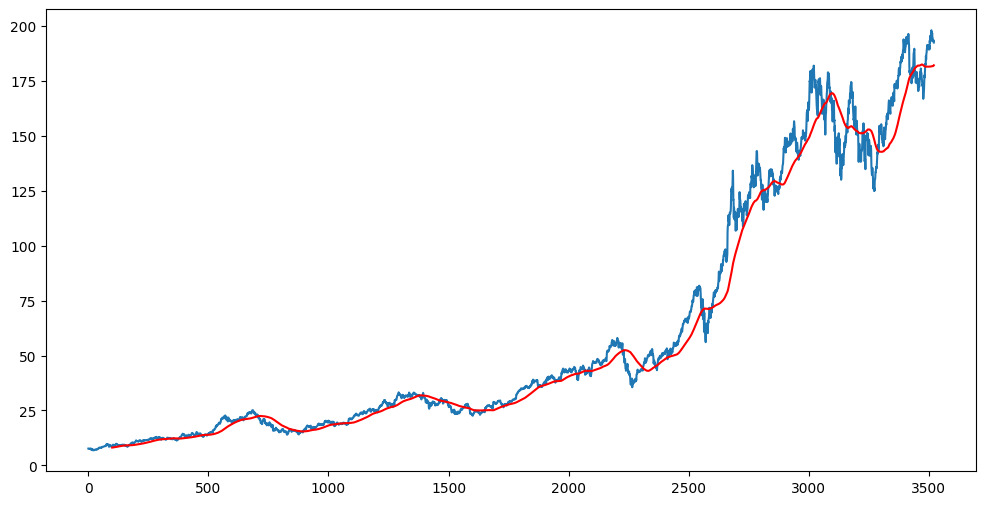

In [40]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [39]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

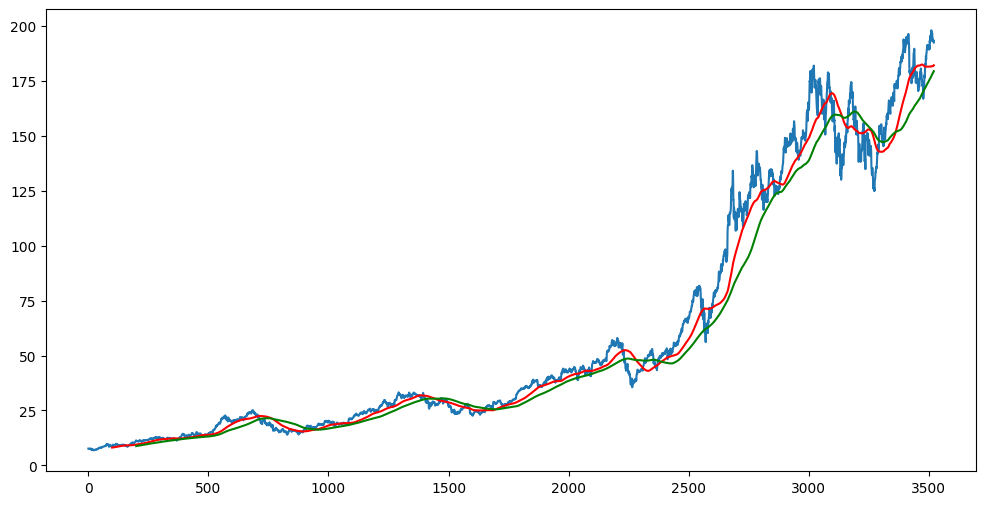

In [41]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [42]:
df.shape

(3522, 5)

In [43]:
#spliting data into training and testing

In [46]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [47]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [48]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


In [52]:
data_training_arrray = scaler.fit_transform(data_training)
data_training_arrray

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [54]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training_arrray[i-100: i])
    y_train.append(data_training_arrray[i, 0])

x_train

[array([[1.50264684e-02],
        [1.52796526e-02],
        [1.29463071e-02],
        [1.26794281e-02],
        [1.36374041e-02],
        [1.23578431e-02],
        [1.07224283e-02],
        [1.27273278e-02],
        [1.18925316e-02],
        [9.49760070e-03],
        [1.57312602e-02],
        [1.34663520e-02],
        [1.09619177e-02],
        [3.90030483e-03],
        [7.54060090e-03],
        [9.50444351e-03],
        [1.08319225e-02],
        [4.95407114e-03],
        [6.83368042e-06],
        [1.83381997e-03],
        [2.60703994e-03],
        [4.91301424e-03],
        [0.00000000e+00],
        [2.33332729e-03],
        [1.41641731e-03],
        [2.83285288e-03],
        [2.10068067e-03],
        [4.52982566e-03],
        [5.69992898e-03],
        [7.76641384e-03],
        [7.18479272e-03],
        [7.44480147e-03],
        [6.58262488e-03],
        [5.72729111e-03],
        [3.42815963e-03],
        [5.89152784e-03],
        [6.80843782e-03],
        [8.60121003e-03],
        [1.1

In [55]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [61]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu', ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [62]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0756
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 0.0067
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0073
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0050
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - loss: 0.0052
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0053
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0058
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0042
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0047
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0040
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0045
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0041
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0047
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0039
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.0038
Epo

In [67]:
model.save('my_model.keras')

In [68]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [74]:
data_training.tail(100)

,Close
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [69]:
past_100_days = data_training.tail(100)

In [80]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [81]:
final_df.head

<bound method NDFrame.head of            Close
0      44.345001
1      44.575001
2      43.767502
3      43.325001
4      44.910000
...          ...
1152  193.600006
1153  193.050003
1154  193.149994
1155  193.580002
1156  192.529999

[1157 rows x 1 columns]>

In [83]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [84]:
input_data.shape

(1157, 1)

In [87]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [89]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [90]:
#making predections

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [91]:
y_predicted.shape

(1057, 1)

In [92]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [93]:
scaler.scale_

array([0.00646057])

In [95]:
scale_factor = 1/0.00646057
y_predicted = y_predicted* scale_factor
y_test = y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

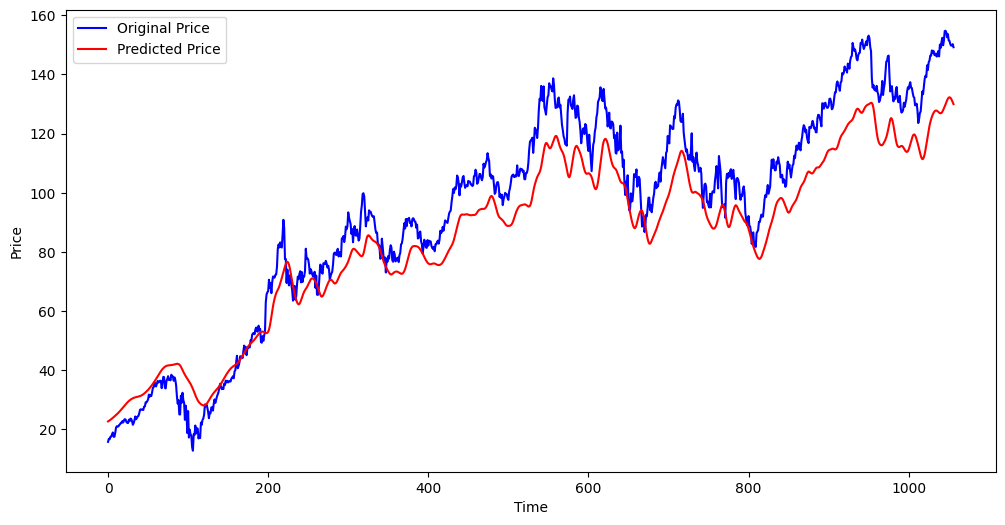

In [96]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show